<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/TEST_TURING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/cardio_base.csv')
data.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke
0   0  18393       2     168    62.0    110     80            1      0
1   1  20228       1     156    85.0    140     90            3      0
2   2  18857       1     165    64.0    130     70            3      0
3   3  17623       2     169    82.0    150    100            1      0
4   4  17474       1     156    56.0    100     60            1      0

In [5]:
data['new_age'] = np.round(data['age']/360,0)

In [6]:
h = data.groupby(['height'])['id'].count()

([<matplotlib.patches.Wedge at 0x7f8646290910>,
 [Text(1.0999999988921874, 4.9367884639695425e-05, '55'),
  Text(1.0999999900296855, 0.0001481036535213381, '57'),
  Text(1.0999999723046816, 0.0002468394212097363, '59'),
  Text(1.099999945717176, 0.0003455751869093938, '60'),
  Text(1.099999910267169, 0.0004443109498248142, '64'),
  Text(1.099999840474969, 0.0005924145872373522, '65'),
  Text(1.0999997507421422, 0.0007405182139106905, '66'),
  Text(1.0999996000796213, 0.000937989697938979, '67'),
  Text(1.0999993618999149, 0.001184829008933485, '68'),
  Text(1.0999990683296021, 0.0014316682602657771, '70'),
  Text(1.0999987935921245, 0.0016291396106507083, '71'),
  Text(1.0999986429296487, 0.001727875264980902, '72'),
  Text(1.099998483404682, 0.0018266109053899158, '74'),
  Text(1.0999982275000642, 0.0019747143381610784, '75'),
  Text(1.099997951654849, 0.0021228177351349255, '76'),
  Text(1.0999977566799317, 0.0022215533119042683, '80'),
  Text(1.0999975528425308, 0.002320288870774956

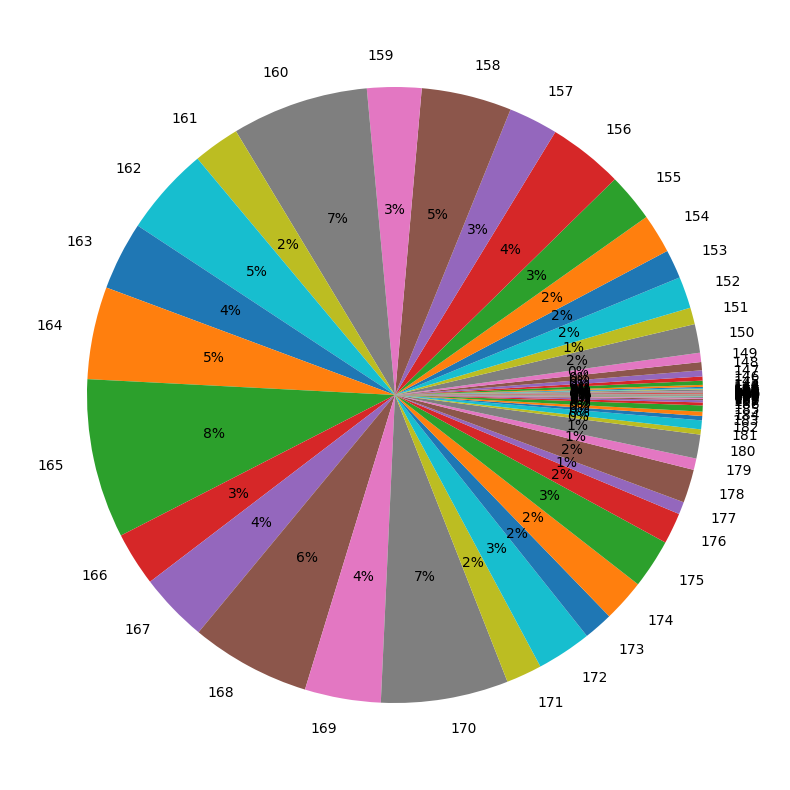

In [7]:
plt.figure(figsize=(10,10))
plt.pie(x=h.values, labels = h.index, autopct="%1.f%%")

<BarContainer object of 109 artists>

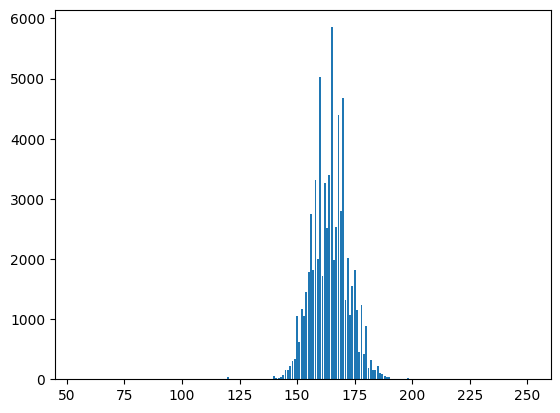

In [8]:
plt.bar(x=h.index, height=h.values)

<ipython-input-30-1031fb95bb4d>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

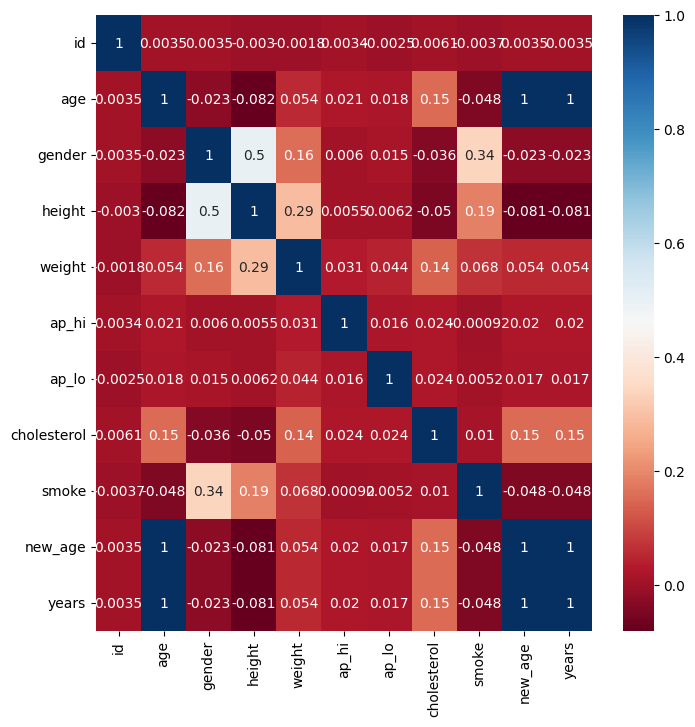

In [30]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True, cmap='RdBu' )

In [11]:
data.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke  \
0   0  18393       2     168    62.0    110     80            1      0   
1   1  20228       1     156    85.0    140     90            3      0   
2   2  18857       1     165    64.0    130     70            3      0   
3   3  17623       2     169    82.0    150    100            1      0   
4   4  17474       1     156    56.0    100     60            1      0   

   new_age  
0     51.0  
1     56.0  
2     52.0  
3     49.0  
4     49.0

In [12]:
data['years'] = np.round(data['age']/360,0)

In [13]:
data.loc[(data['years']>0)  & (data['years']<=20),'age_validation'] = 'Entre 0  20'
data.loc[(data['years']>20) & (data['years']<=30),'age_validation'] = 'Entre 21 y 30'
data.loc[(data['years']>30) & (data['years']<=40),'age_validation'] = 'Entre 31 y 40'
data.loc[(data['years']>40) & (data['years']<=50),'age_validation'] = 'Entre 41 y 50'
data.loc[(data['years']>50),'age_validation'] = 'Mayor 50'

In [14]:
data.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke  \
0   0  18393       2     168    62.0    110     80            1      0   
1   1  20228       1     156    85.0    140     90            3      0   
2   2  18857       1     165    64.0    130     70            3      0   
3   3  17623       2     169    82.0    150    100            1      0   
4   4  17474       1     156    56.0    100     60            1      0   

   new_age  years age_validation  
0     51.0   51.0       Mayor 50  
1     56.0   56.0       Mayor 50  
2     52.0   52.0       Mayor 50  
3     49.0   49.0  Entre 41 y 50  
4     49.0   49.0  Entre 41 y 50

In [15]:
pv_year = pd.pivot_table(data,index='height',values='cholesterol', aggfunc='mean')
pv_year

cholesterol
height             
55         1.000000
57         1.000000
59         1.000000
60         1.000000
64         1.000000
...             ...
197        1.250000
198        1.142857
200        2.000000
207        1.000000
250        3.000000

[109 rows x 1 columns]

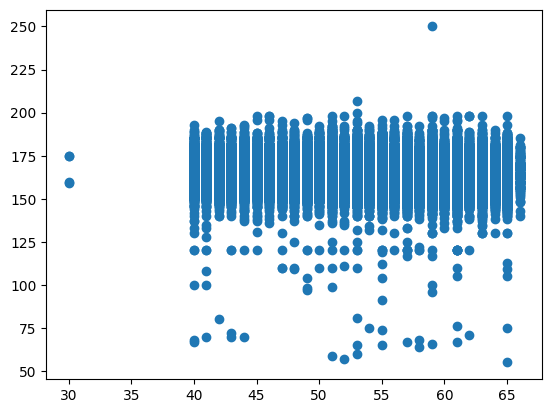

In [20]:
plt.scatter(data['new_age'],data['height'])

In [27]:
import plotly.express as px

px.box(data,x='height', y='age_validation',color='age_validation')

In [35]:
px.pie(data, names='smoke', values='new_age')

In [43]:
px.pie(data, names='gender', values='new_age')

In [37]:
px.pie(data, names='age_validation', values='cholesterol')

In [41]:
px.scatter(data, x='weight',y='height',trendline='ols', color='age_validation')